### Autorki rozwiązania: Agnieszka Prudło i Aleksandra Krzemińska

# Podział pracy
Obie zrobiłyśmy wszystkie zadania, a następnie przedyskutowałyśmy rozwiązania i wybrałyśmy najbardziej dokładne i czytelne wersje.

W zadaniu 4 nie mogłyśmy zdecydować, czy dzień z przekroczoną normą to taki, gdzie przynjamniej 1 pomiar jest powyżej normy, czy średnia pomiarów z doby jest powyżej normy. Z tego powodu zostawiłyśmy obie wersje rozwiązania (rónica w kodzie jest bardzo niewielka, jedno użycie funkcji .max() lub .mean())


### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

In [1]:
import data_loader
import visualizations
import average_and_limits

In [2]:
# id archiwum dla poszczególnych lat
years = [2014, 2019, 2024]
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

data = data_loader.download_gios_archives(years, gios_url_ids, gios_pm25_file)

c:\Users\agnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# usuwanie niepotrzebnych wierszy
# ujednolicanie struktury danych

data_edited = data_loader.edit_df(data)

Liczba dni w 2014 się zgadza

Liczba dni w 2019 się zgadza

Liczba dni w 2024 się zgadza



In [4]:
# pobieranie metadanych stacji pomiarowych

# url metadanych
gios_metadata_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622"
gios_metadata = data_loader.download_gios_metadata(gios_metadata_url)

In [5]:
# mapowanie starych kodów stacji na nowe

data_edited = data_loader.create_code_map(gios_metadata, data_edited)

In [6]:
# tworzymy MultiIndex

data_multiindex = data_loader.multiindex_code_city(data_edited, gios_metadata)

In [7]:
# korekta indeksu daty i godziny (przesunięcie rekordów o 00:00:00 na poprzedni dzień)

data_multiindex_corrected = data_loader.correct_datetime_index(data_multiindex)

In [9]:
# scalenie danych z poszczególnych lat, zapis do pliku CSV i kontrola poprawności
df_all = data_loader.save_combined_data(data_multiindex_corrected, "poziom_zanieczyszczeń.csv")

# sprawdzenie wyglądu scalonych danych
df_all.head()

2014    365
2019    365
2024    366
dtype: int64
(8760, 35)
(8760, 63)
(8784, 96)
(26304, 23)
26304


Miejscowość              Wrocław    Bydgoszcz         Łódź       Zgierz  \
Kod stacji          DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz   
2014-01-01 01:00:00          152   116.214424    81.029259   119.696114   
2014-01-01 02:00:00          137          NaN    210.36467    70.337502   
2014-01-01 03:00:00          129          NaN    66.425789    40.915695   
2014-01-01 04:00:00          129          NaN    53.999668    37.817917   
2014-01-01 05:00:00          105          NaN     52.23967    38.814861   

Miejscowość         Zielona Góra       Kraków                 Legionowo  \
Kod stacji          LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
2014-01-01 01:00:00          NaN          104           64        44.44   
2014-01-01 02:00:00          NaN          104           63       103.07   
2014-01-01 03:00:00          NaN           91           62        74.91   
2014-01-01 04:00:00          NaN           89           58        39.27   
2014-01-01 05:00:00          NaN           83           55        26.51   

Miejscowość                Płock        Radom  ...     Żyrardów  \
Kod stacji          MzPlocMiReja MzRadTochter  ... MzZyraRoosev   
2014-01-01 01:00:00          NaN        58.67  ...          NaN   
2014-01-01 02:00:00          NaN        40.07  ...          NaN   
2014-01-01 03:00:00          NaN        32.72  ...          NaN   
2014-01-01 04:00:00          NaN        27.44  ...          NaN   
2014-01-01 05:00:00          NaN        28.01  ...          NaN   

Miejscowość         Kędzierzyn-Koźle     Przemyśl       Gdańsk     Katowice  \
Kod stacji              OpKKozBSmial PkPrzemGrunw PmGdaLeczkow SlKatoKossut   
2014-01-01 01:00:00              115       48.175         58.4          104   
2014-01-01 02:00:00              134       33.747         28.5          107   
2014-01-01 03:00:00              137       30.622           27          114   
2014-01-01 04:00:00              137       28.642         28.7          108   
2014-01-01 05:00:00              136       27.781         25.7           88   

Miejscowość          Złoty Potok      Olsztyn       Kalisz     Szczecin  \
Kod stacji          SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze   
2014-01-01 01:00:00           32    84.121582          NaN      105.489   
2014-01-01 02:00:00           39    75.444382         82.5      149.797   
2014-01-01 03:00:00           43    34.427513           83      86.9602   
2014-01-01 04:00:00           42    32.742474         73.1      74.8762   
2014-01-01 05:00:00           40    32.714367         74.9      61.9866   

Miejscowość                       
Kod stacji          ZpSzczPilsud  
2014-01-01 01:00:00          109  
2014-01-01 02:00:00          118  
2014-01-01 03:00:00          120  
2014-01-01 04:00:00          104  
2014-01-01 05:00:00           96  

[5 rows x 23 columns]

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [9]:
# obliczanie średnich miesięcznych dla każdego roku i stacji

monthly_df = average_and_limits.monthly_mean(df_all)
monthly_df

Miejscowość       Wrocław    Bydgoszcz         Łódź       Zgierz Zielona Góra  \
Kod stacji   DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz LuZielKrotka   
rok  miesiąc                                                                    
2014 1          42.797037    30.616434    35.407387    31.518199    42.946602   
     2          38.649351    51.856173    45.704915    46.359747    33.748299   
     3             36.125    40.556041    35.259896    36.861373    37.276358   
     4          25.353659    19.772776    23.474251    18.767278    23.778929   
     5          14.963925     11.90341    16.407493    11.068347    12.545727   
     6          12.160121     9.298433    14.518648     6.742433     12.42236   
     7          15.945985    13.444708    18.111519     8.013444    17.189873   
     8          12.982327    11.135863    16.008222      7.29842    12.459618   
     9          23.489083    20.824928    26.981774    12.637631    19.722835   
     10         35.526761    34.510773    36.905487    22.638426    28.407028   
     11         42.607519    36.765969    40.767644    24.943106    49.757198   
     12         44.335203     21.79606    46.016825    35.692493    30.137021   
2019 1          30.098849     30.53665    29.802108    47.697331    20.267772   
     2          31.104852    30.970726    28.895296    44.070254    20.544711   
     3            19.1796    16.377068    18.958108    31.698762    11.838743   
     4          21.718586     20.67992    19.223611    22.946328    14.053656   
     5          13.776702    15.580947    12.780323    14.815451     8.342351   
     6          12.825616    20.193602    11.119444    14.799107    10.350858   
     7           11.02603    12.522816     7.969086    10.014388     8.842472   
     8          11.148639    19.318594      9.34543    14.877493    10.035961   
     9           12.52082    15.593327     12.35865    19.233645     8.899498   
     10         20.090519    24.574939    20.396226     33.51385    14.256459   
     11         23.608889    27.440278    21.362745    29.178063    19.004625   
     12         23.432526    24.857317    21.565868     35.52168    17.188602   
2024 1          24.596505    17.465593    19.651556    34.638128    13.486951   
     2          16.553401    14.689098    15.920893    23.898549    13.368375   
     3          24.241184    23.096828    21.435484    29.892339    27.689058   
     4          11.894437    11.310778     9.441337    14.085376     14.02563   
     5          11.041256    10.873099    10.557143     8.741655    18.892276   
     6          10.509471      8.96173     9.704167     9.009801    15.520613   
     7            9.09769     7.758732     7.758681     8.683737     10.88358   
     8          11.574059     9.209726     9.851478    10.932571    13.275719   
     9          13.114571    12.913372    13.984844    14.973056    19.249787   
     10         15.125575    13.104191    16.039838    22.542396    16.264714   
     11         20.102646     14.33239    20.072308    33.866328    15.278151   
     12         24.586388    12.487615     21.66568    36.112635    12.673181   

Miejscowość        Kraków                 Legionowo        Płock        Radom  \
Kod stacji   MpKrakAlKras MpKrakBulwar MzLegZegrzyn MzPlocMiReja MzRadTochter   
rok  miesiąc                                                                    
2014 1          60.350806    47.241565    39.815343    31.855108    40.485457   
     2          86.708955    62.591045    62.753609    50.473512    53.218289   
     3          54.498652    39.900135    47.863719    31.600595    43.391626   
     4            34.7433    24.543417    27.777273    20.852646    27.699527   
     5          19.547718    14.522849    14.622747    12.079019    14.581354   
     6          21.068056    14.140473     11.40353     9.624125    12.382569   
     7           20.83871    14.062162    13.315285    12.634177    14.962917   
     8          17.806452    1

In [10]:
# grupowanie po miastach
monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()
monthly_df_grouped

C:\Users\agnie\AppData\Local\Temp\ipykernel_20108\1023808079.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()


Miejscowość   Bydgoszcz     Gdańsk     Kalisz   Katowice     Kraków  \
rok  miesiąc                                                          
2014 1        30.616434  15.574259  42.099015  47.531587  53.796186   
     2        51.856173  25.712251  52.429559  57.502297  74.650000   
     3        40.556041  15.098253  53.279132  42.855405  47.199394   
     4        19.772776  13.423333  32.493501  26.925608  29.643359   
     5        11.903410  10.499194  17.961618  14.893387  17.035284   
     6         9.298433   9.224652  15.111662  13.743375  17.604264   
     7        13.444708  14.029542  18.721083  12.411844  17.450436   
     8        11.135863  10.857903  15.538881  11.385135  15.214382   
     9        20.824928  15.774861  25.376090  22.610570  28.543363   
     10       34.510773  20.708748  36.305965  34.464336  48.326778   
     11       36.765969  27.529722  41.549491  42.026389  58.653472   
     12       21.796060  14.892473  43.446020  47.040377  55.024194   
2019 1        30.536650        NaN  30.551606  43.471370  37.251181   
     2        30.970726        NaN  31.962451  42.289597  42.054074   
     3        16.377068        NaN  18.947269  28.847650  27.460429   
     4        20.679920        NaN  22.958153  25.093859  23.953820   
     5        15.580947        NaN  15.123098  17.455341  15.627068   
     6        20.193602        NaN  13.754051  13.626209  15.081786   
     7        12.522816   9.428528  10.369506  12.361125  13.951702   
     8        19.318594  11.469635  11.633863  12.139253  16.995265   
     9        15.593327  11.325750  14.250190  13.649122  16.989998   
     10       24.574939  17.676947  22.190271  14.789763  28.788251   
     11       27.440278  27.211042  22.704673  30.563475  32.586801   
     12       24.857317  21.460477  24.560960  29.753704  34.944159   
2024 1        17.465593  16.550539  24.507392  25.719624  25.793272   
     2        14.689098  15.185036  18.619253  18.910776  20.877234   
     3        23.096828  22.579217  28.021131  24.651210  26.781339   
     4        11.310778  15.131198  13.471250  13.398333  14.687642   
     5        10.873099  14.450538  12.682661   9.588809  12.010551   
     6         8.961730  12.335188  12.278333  11.901839  12.176944   
     7         7.758732   9.763795  10.261725  10.496765  11.932661   
     8         9.209726  11.628857  12.873387  11.948790  12.825124   
     9        12.913372  16.022270  17.357799  13.956111  14.972138   
     10       13.104191  14.074832  19.584005  16.799194  16.930712   
     11       14.332390  13.743611  21.465132  22.538056  21.511319   
     12       12.487615  13.868102  27.353763  30.312903  24.848048   

Miejscowość   Kędzierzyn-Koźle  Legionowo    Olsztyn   Przemyśl      Płock  \
rok  miesiąc                                                                 
2014 1               42.847025  39.815343  25.550652  32.047507  31.855108   
     2               43.510433  62.753609  40.799969  51.465929  50.473512   
     3               45.567347  47.863719  24.921921  30.040347  31.600595   
     4               29.082759  27.777273  17.748875  20.732240  20.852646   
     5               16.551867  14.622747  13.588730  10.376133  12.079019   
     6               15.101010  11.403530  11.180283  10.223309   9.624125   
     7               17.140768  13.315285  14.187690  11.513599  12.634177   
     8               13.721805  10.916430  11.979424  12.378786  11.557197   
     9               21.807418  19.867370  17.611099  22.275242  18.120570   
     10              35.432836  41.550834  28.258493  32.732872  30.985687   
     11              41.856941  44.292135  37.954069  36.420283  35.394238   
     12              44.927978  41.402273  29.337760  29.497410  31.519987   
2019 1               39.263630  35.833185  25.135166  39.624731  28.513719   
     2               36.635308  30.729256  21.482717  30.620628  27.195349   
     3               21.542209  21.544471  13.374064 

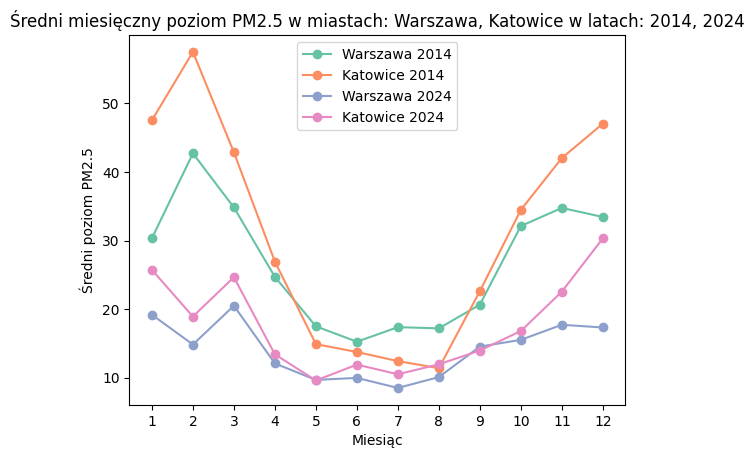

In [11]:
# wykres porównujący średnie miesięczne poziomy PM2.5 w Warszawie i Katowicach w 2014 i 2024 roku

visualizations.plot_average(monthly_df_grouped, [2014, 2024], ['Warszawa', 'Katowice'])

# Opis

W roku 2014 zanieczyszczenie powietrza było wyższe niż w 2024 zarówno w Warszawie jak i w Katowicach. Krzywe wskazują również na większe zanieczyszecznie powietrza zimą, co może być spowodowane zwiększonym zapotrzebowaniem energetycznym. W Katowicach poziom zanieczyszczeń w każdym roku jest wyższy niż w Warszawie (z wyłaczeniem miesięcy letnich: od maja do września 2014). Może to być spowodowane faktem, że Katowice są miastem górniczym. Co ciekawe, w roku 2014 luty był najbardziej zanieczyszczonym miesiącem w obu miastach, a w 2024 nie obserwujemy już takiego zjawiska. Wykres pokazuje, że w ciągu ostatnich lat stan powietrza poprawił się.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

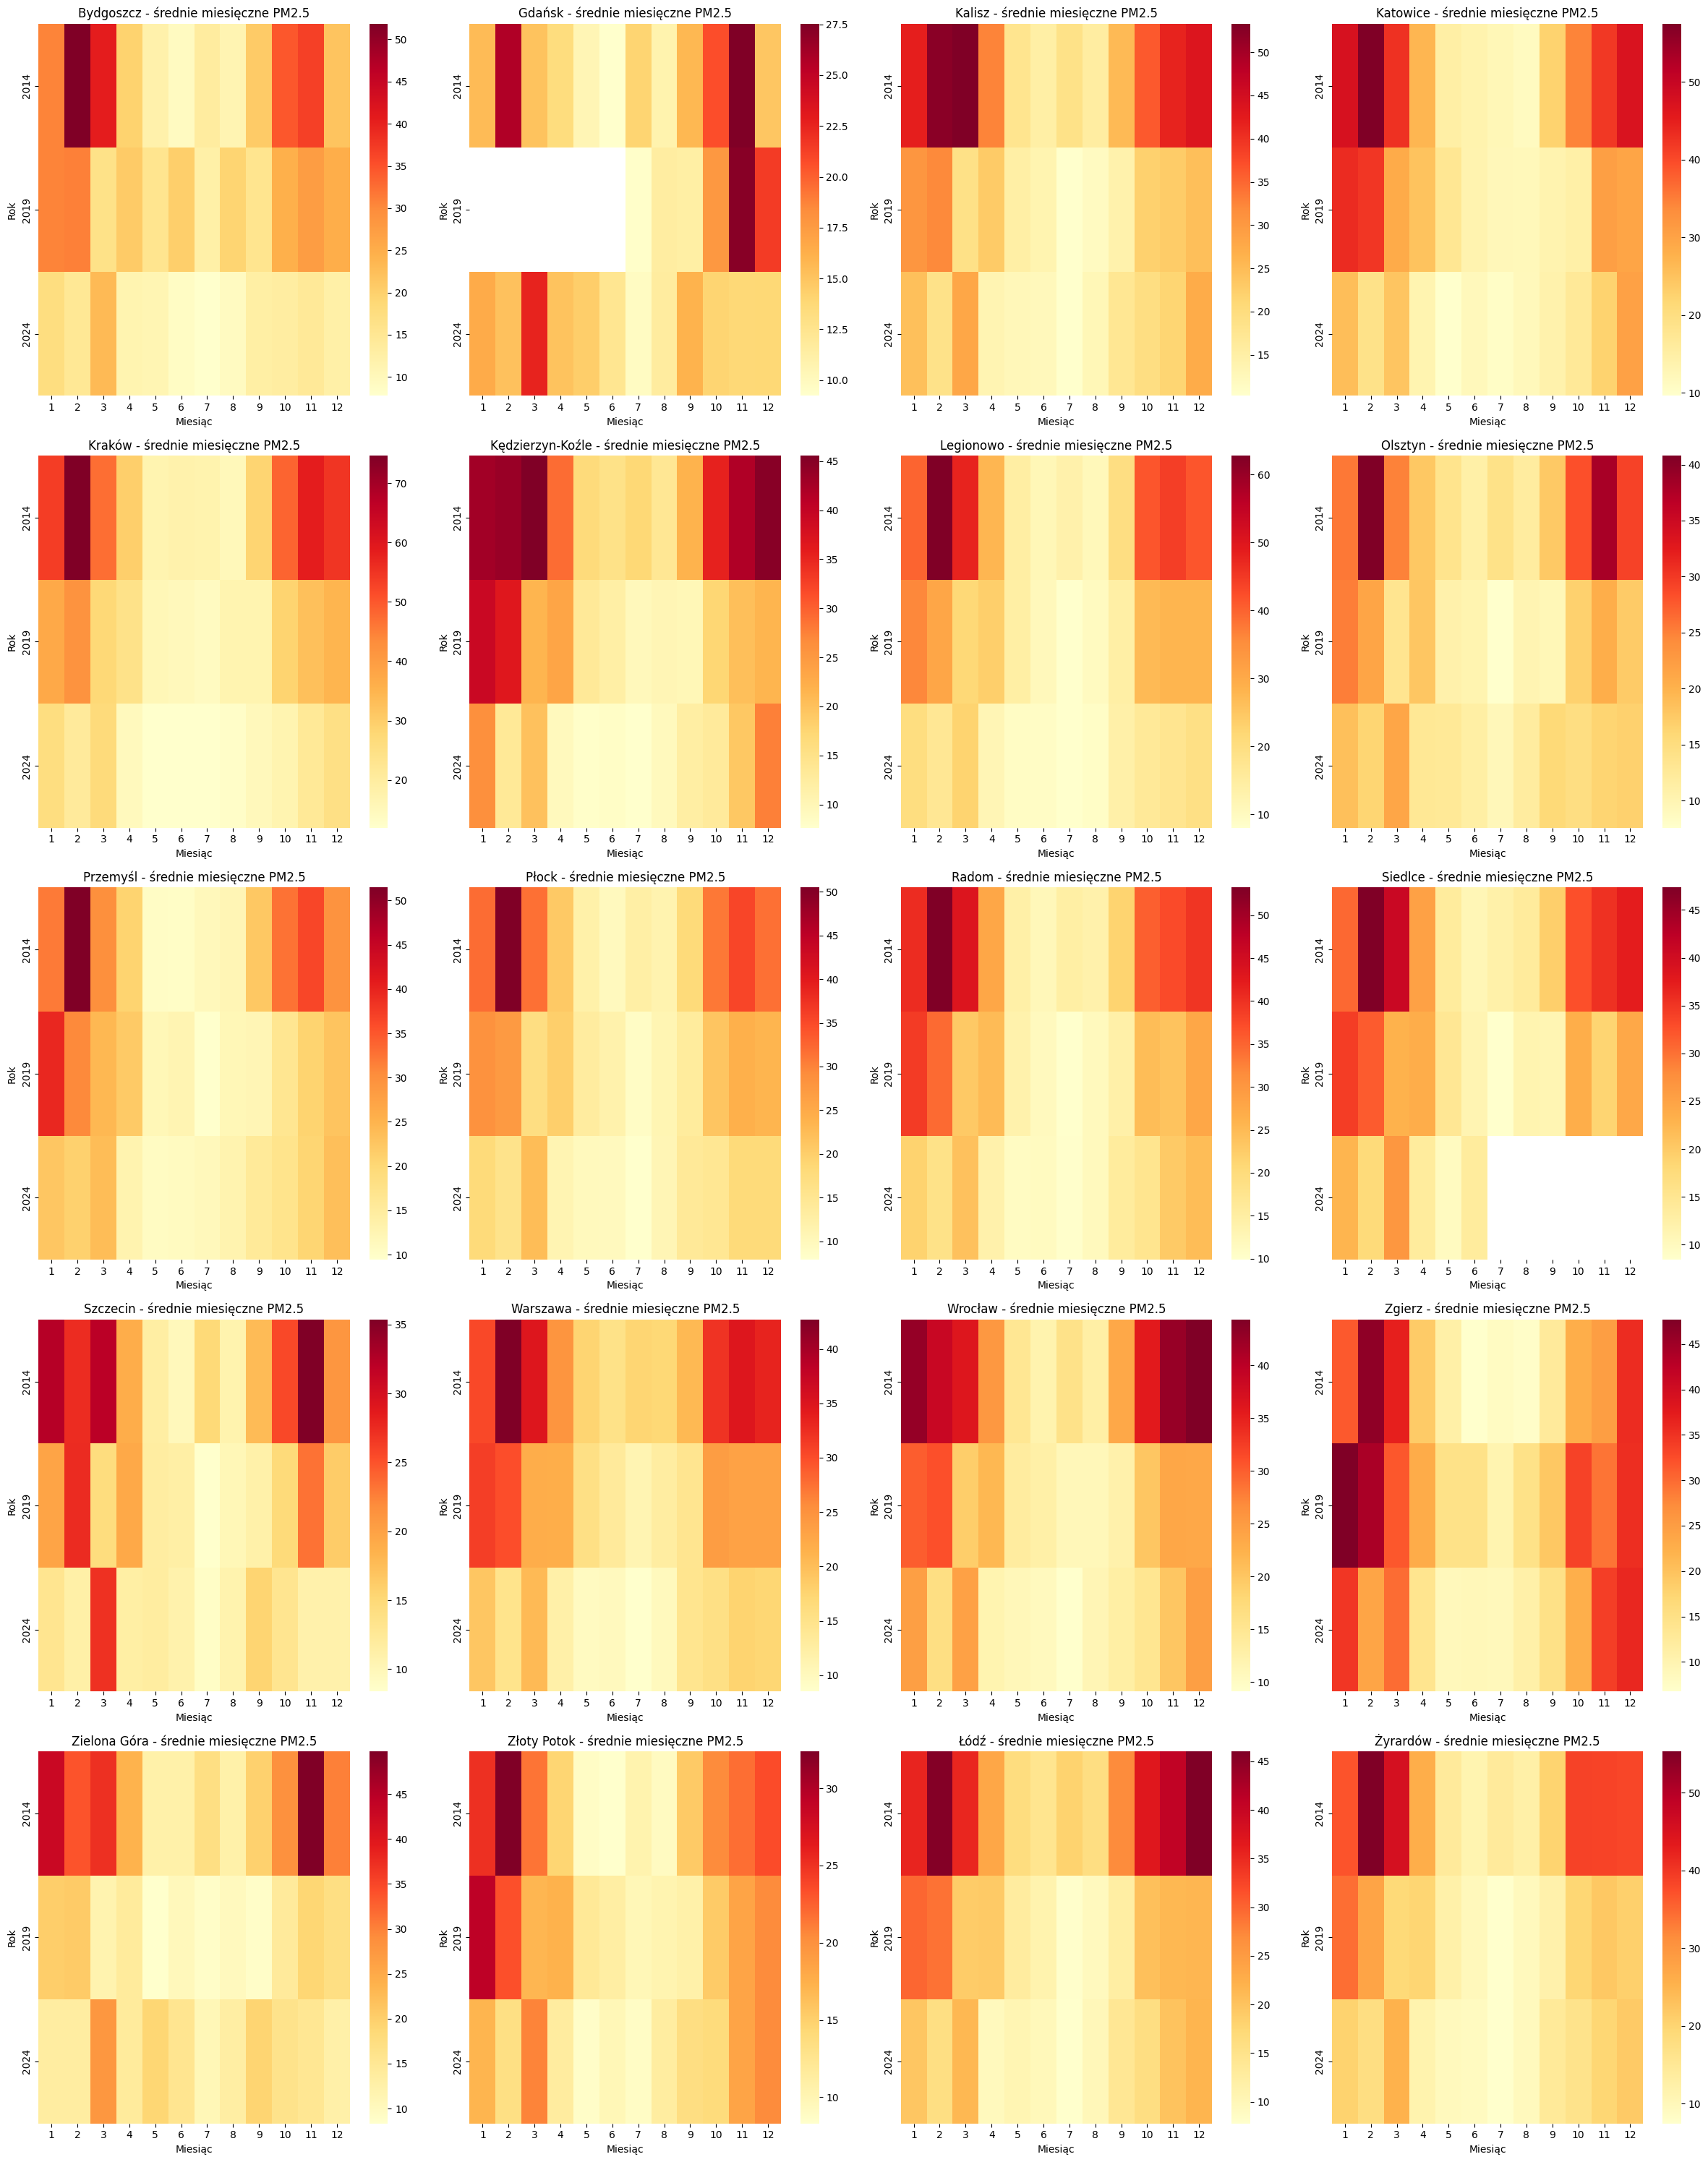

In [12]:
visualizations.heatmaps(monthly_df_grouped)

# Opis

Na wykresach widać duże różnice w zanieczyszczeniach w zależności od pory roku: w miesiącach zimowych jest ono wyższe, szczególnie w 2014 roku. Wynika to prawdopodobnie z konieczności ogrzewania budynków i większego zapotrzebowania na energię. Widać także, że w późniejszych latach ogólne zanieczyszczenie jest niższe- stan powietrza z roku na rok się poprawia.

Zauważalny jest także brak danych dla Gdańska w pierwszej połowie 2019 roku oraz dla Siedlec w drugiej połowie 2024 roku.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [13]:
norms_df = average_and_limits.find_above_norm(df_all, years=years, sort_by=2024, norm=15)
norms_df

,,2014,2019,2024
Miejscowość,Kod stacji,,,
Szczecin,ZpSzczAndrze,175,116,72
Siedlce,MzSiedKonars,245,190,79
Warszawa,MzWarWokalna,238,154,102
Bydgoszcz,KpBydPlPozna,218,218,108
Kędzierzyn-Koźle,OpKKozBSmial,259,174,111
Złoty Potok,SlZlotPotLes,173,143,117
Legionowo,MzLegZegrzyn,250,207,121
Łódź,LdLodzCzerni,285,183,128
Szczecin,ZpSzczPilsud,213,163,130


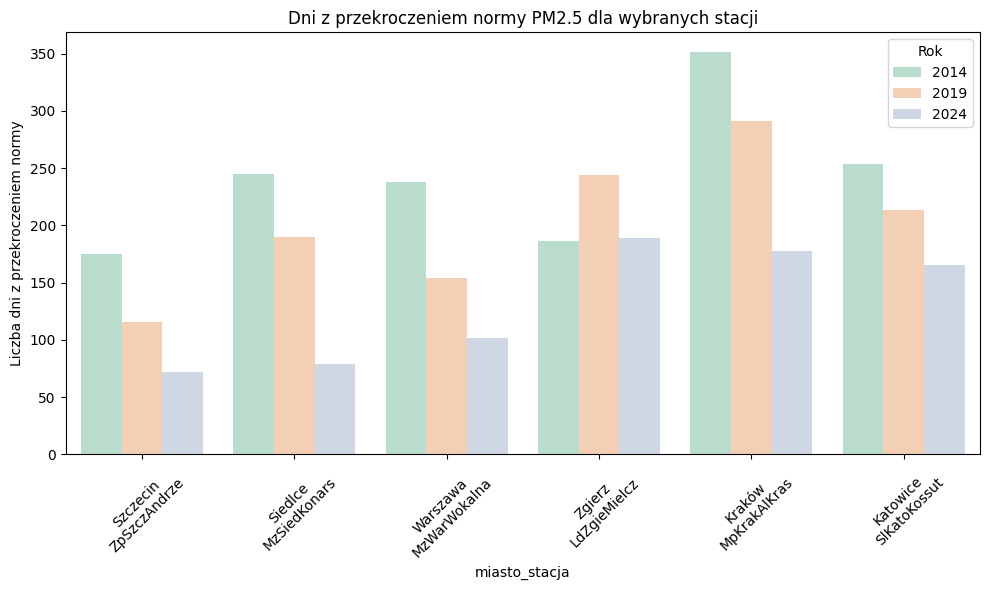

In [14]:
visualizations.bar_plots(norms_df, year=2024)

# Opis

Na wykresie widać, że w większości stacji z roku na rok nastepuje zmniejszenie liczby dni w których została przekroczona norma, co sugeruje poprawę jakości powietrza. Jedyną stacją nie wykazującą poprawy jest Stacja w Zgierzu. Dla Siedlec zanotowano jeden z najniższych wyników w 2024 roku, co prawdopodobnie spowodowane jest brakiem danych pomiarowych z drugiej połowy tego roku (w praktyce nie powinniśmy brać pod uwagę danych z tej stacji, ponieważ nie oddają rzeczywistego stanu sytuacji). Najwięcej dni z przekroczniem normy notuje się w Krakowie, co wskazuje na poważny problem w tym mieście. Mimo spadków w tym okresie, liczba dni z przekroczeniami norm pozostaje istotna, co pokazuje potrzebę kontynuowania działań poprawiających jakość powietrza.